In [14]:
#Charger les biblio
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
import string
from subprocess import check_output
import seaborn as sns
from pylab import *
%matplotlib inline
sns.set()

In [2]:
#Importation de la table
df = pd.read_csv("tab_A7_6mn.csv", sep = ',')
#Lire la table en dataframe
df = pd.DataFrame(df)
df.head()

,rgs,pr,m,js,jma,hhmm,To,Q,Vitesse,A,Code
0,759#M7I,264,687,Ve,01/01/16,00:00,1,340,95,759,M7I
1,760#M7J,265,320,Ve,01/01/16,00:00,3,360,103,760,M7J
2,709#M7i,264,687,Ve,01/01/16,00:00,2,510,99,709,M7i
3,710#M7j,265,320,Ve,01/01/16,00:00,1,290,97,710,M7j
4,764#M7N,267,230,Ve,01/01/16,00:00,0,0,0,764,M7N


In [4]:
selection = (df['Q'] <= 6000)
q = df[selection]
### Vitesse horaire
selection = (df['Vitesse'] <= 160)
v = df[selection]
### To horaire
selection = (df['To'] <= 100)
t = df[selection]
### Débit et TO incompatibles
selection =  (df['Q'] > 5)
qq = df[selection]
### Vitesse horaire
selection = (df['Vitesse'] > 0)
vv = df[selection]
### To horaire
selection = (df['To'] > 0)
tt = df[selection]
# Transformer les donnees a des dataframe
lst = [q,v,t,qq,vv,tt]
for i in lst :
    i = pd.DataFrame(i)

In [5]:
# Eliminer les valeurs aberrantes
inter1 = pd.merge(q, v, how='inner')
inter2 = pd.merge(t, qq, how='inner')
inter3 = pd.merge(vv, tt, how='inner')
inter4 = pd.merge(inter1, inter2, how='inner')
df = pd.merge(inter3, inter4, how='inner')
df.describe()

,pr,m,To,Q,Vitesse,A
count,978220.000000,978220.000000,978220.000000,978220.000000,978220.000000,978220.000000
mean,271.635782,494.627473,10.861530,2076.327023,88.658586,792.809158
std,4.277659,274.310524,10.205109,1438.277246,14.057490,51.593181
min,264.000000,86.000000,1.000000,10.000000,1.000000,709.000000
25%,269.000000,278.000000,3.000000,780.000000,82.000000,760.000000
50%,272.000000,440.000000,8.000000,1810.000000,90.000000,805.000000
75%,275.000000,790.000000,16.000000,3190.000000,98.000000,851.000000
max,279.000000,900.000000,100.000000,6000.000000,160.000000,865.000000


Pour les données 6 minutes, on les traite sur les jours ouvrés, donc on élimine les données du week-end.

In [6]:
df = df[~df['js'].astype(str).str.startswith('Sa')]
df = df[~df['js'].astype(str).str.startswith('Di')]
df.head()

,rgs,pr,m,js,jma,hhmm,To,Q,Vitesse,A,Code
0,759#M7I,264,687,Ve,01/01/16,00:00,1,340,95,759,M7I
1,760#M7J,265,320,Ve,01/01/16,00:00,3,360,103,760,M7J
2,709#M7i,264,687,Ve,01/01/16,00:00,2,510,99,709,M7i
3,710#M7j,265,320,Ve,01/01/16,00:00,1,290,97,710,M7j
4,765#M7O,267,861,Ve,01/01/16,00:00,1,360,103,765,M7O


Pour ajouter la concentration nous servons de l’équation suivante : $K = Q/V$. Ces trois variables sont reliées par la relation $Q=K\times V$.

In [7]:
# Ajouter le champs de Concentration K
df['K'] = (df['Q'])/(df['Vitesse'])
#Trier la table par heure.
df = df.sort_values(by = 'hhmm')
df.describe()

,pr,m,To,Q,Vitesse,A,K
count,679387.000000,679387.000000,679387.000000,679387.000000,679387.000000,679387.000000,679387.000000
mean,271.613936,496.324438,12.238358,2214.834402,87.684411,792.606361,27.419988
std,4.281171,274.221317,11.134480,1500.296849,14.882436,51.592856,22.001172
min,264.000000,86.000000,1.000000,10.000000,1.000000,709.000000,0.158730
25%,269.000000,278.000000,4.000000,840.000000,81.000000,760.000000,9.148936
50%,272.000000,440.000000,10.000000,2010.000000,89.000000,805.000000,23.152174
75%,275.000000,790.000000,18.000000,3400.000000,97.000000,851.000000,40.531915
max,279.000000,900.000000,100.000000,6000.000000,160.000000,865.000000,227.777778


Text(0.5, 0.98, 'Diagramme de niveau de service, $Q=f(K)$ et $Q=f(To)$ ')

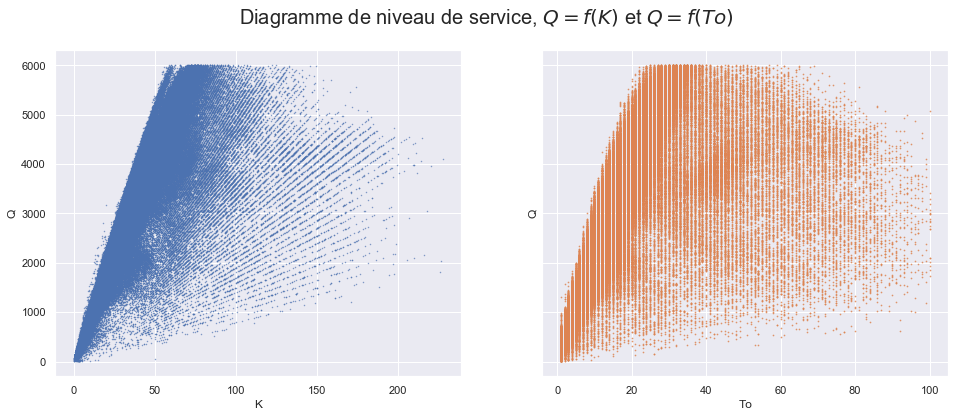

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(16,6), sharey=True)
sns.regplot(x= df['K'], y=df['Q'], fit_reg=False,scatter_kws={'s':.2}, ax=axs[0])
sns.regplot(x= df['To'], y=df['Q'], fit_reg=False,scatter_kws={'s':.5}, ax=axs[1])
fig.suptitle("Diagramme de niveau de service, $Q=f(K)$ et $Q=f(To)$ ", fontsize=20)

In [18]:
#Identifier les donnees de chaque stations
groupe = df.groupby('Code')

In [30]:
#Table de donnees de la station M7i
M7i = groupe.get_group('M7i')
#transformer la table en dataframe
M7i = pd.DataFrame(M7i)
M7i.describe()

,pr,m,To,Q,Vitesse,A,K
count,22674.0,22674.0,22674.000000,22674.000000,22674.000000,22674.0,22674.000000
mean,264.0,687.0,16.645144,2438.975037,86.955500,709.0,31.115019
std,0.0,0.0,14.138722,1488.668693,13.508025,0.0,22.343376
min,264.0,687.0,1.000000,40.000000,6.000000,709.0,0.869565
25%,264.0,687.0,4.000000,860.000000,84.000000,709.0,8.865979
50%,264.0,687.0,16.000000,2930.000000,90.000000,709.0,33.200683
75%,264.0,687.0,23.000000,3680.000000,96.000000,709.0,46.049383
max,264.0,687.0,93.000000,5490.000000,118.000000,709.0,139.285714


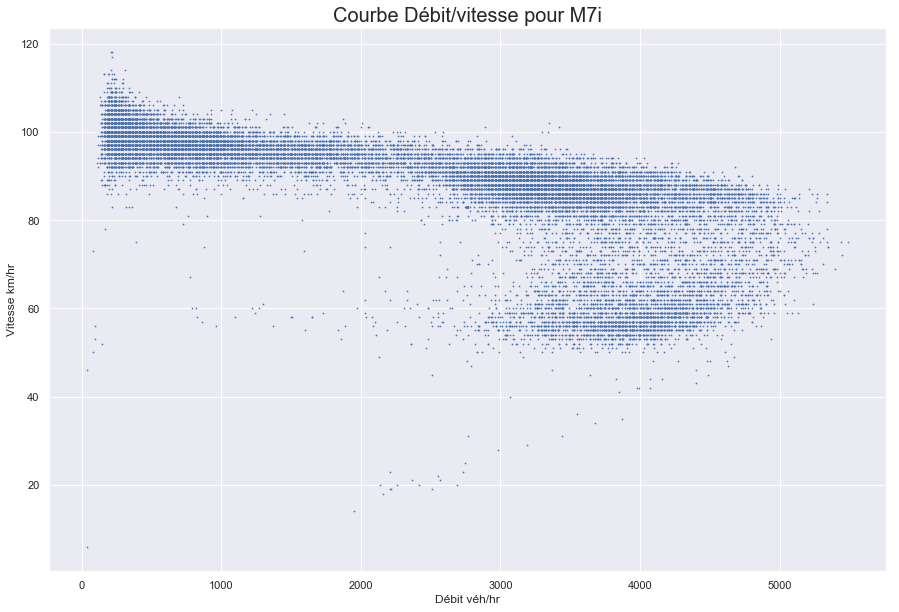

In [32]:
plt.figure(figsize=(15,10))
plt.scatter(M7i.Q, M7i.Vitesse, s =.5)
plt.title("Courbe Débit/vitesse pour M7i",fontsize=20)
plt.xlabel('Débit véh/hr')
plt.ylabel('Vitesse km/hr')
plt.show()

# Analyse du diagramme fondamental

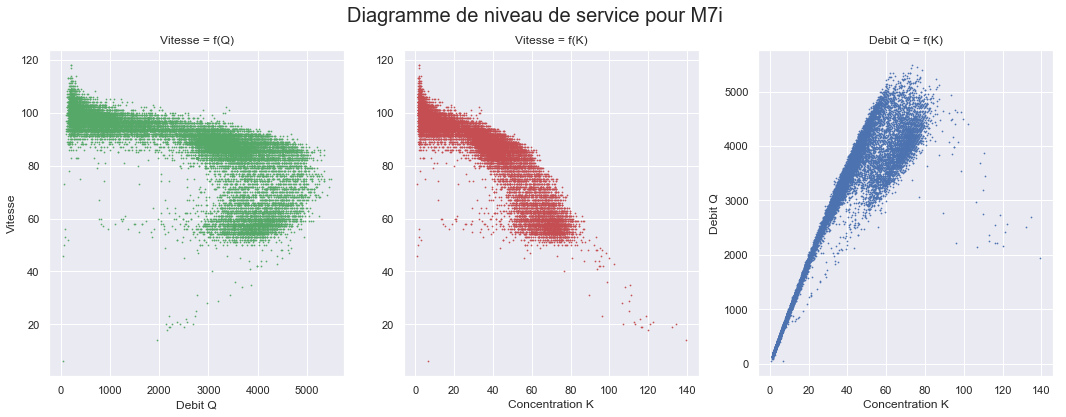

In [33]:
fig = plt.figure(figsize=(18,6))
#AXES
ax1 = fig.add_subplot(131); ax2 = fig.add_subplot(132); ax3 = fig.add_subplot(133)

#Data
ax1.scatter(M7i['Q'], M7i['Vitesse'], s=.5, c='g', marker="o")
ax2.scatter(M7i['K'], M7i['Vitesse'], s=.5, c='r', marker="o")
ax3.scatter(M7i['K'], M7i['Q'], s=.5, c='b', marker="o")

#Labels
ax1.set_xlabel('Debit Q'); ax1.set_ylabel('Vitesse')
ax2.set_xlabel('Concentration K'); fig.suptitle("Diagramme de niveau de service pour M7i", fontsize=20)
ax3.set_xlabel('Concentration K'); ax3.set_ylabel('Debit Q')
ax3.set_title('Debit Q = f(K)'); ax2.set_title('Vitesse = f(K)'); ax1.set_title('Vitesse = f(Q)')
plt.show()

### Détermination de la capacité :
 On préconise de retenir la capacité comme étant la valeur correspondant au quantile 75 de la distribution des débits des heures de pointe, journalières retenues, du matin et du soir.

In [34]:

# L'heure de pointe du matin
cond1 = df.apply ( lambda row : row["hhmm"] > '07:54', axis = 1 )
cond2 = df.apply ( lambda row : row["hhmm"] < '09:06', axis = 1 )
# L'intersection des deux condition.
inter1 = pd.merge(df [cond1], df [cond2], how='inner'); inter1.describe()

,pr,m,To,Q,Vitesse,A,K
count,33857.000000,33857.000000,33857.000000,33857.000000,33857.000000,33857.000000,33857.000000
mean,271.652007,500.133798,22.767995,3197.429483,77.294474,791.468943,45.912273
std,4.276210,273.509649,16.610955,1414.884044,20.054167,51.252434,27.087387
min,264.000000,86.000000,1.000000,20.000000,6.000000,709.000000,0.675676
25%,269.000000,278.000000,11.000000,2030.000000,68.000000,760.000000,25.797101
50%,272.000000,440.000000,19.000000,3250.000000,82.000000,804.000000,42.736842
75%,275.000000,790.000000,28.000000,4330.000000,91.000000,851.000000,60.000000
max,279.000000,900.000000,100.000000,6000.000000,144.000000,865.000000,198.181818


In [ ]:

# L'heure de pointe du soir
cond3 = df.apply ( lambda row : row["hhmm"] > '17:54', axis = 1 )
cond4 = df.apply ( lambda row : row["hhmm"] < '18:06', axis = 1 )
# L'intersection des deux condition.
inter2 = pd.merge(df [cond3], df [cond4],how='inner')
inter2.describe()

Donc pour la première heure de pointe (8h-9h) la valeur correspondant au quantile $75$ est de : $4330 v/h$ et pour la deuxième heure de pointe (17h-18h) la valeur est de : $4602.5 v/h$. On considère alors la capacité comme étant la moyenne de ces deux valeurs. On retient alors pour la station M7i : $$C = 4466.25 v/h$$
Donc on fixe la capacité $C$ pour étudier toutes les niveaux de service de toutes les stations.

In [37]:
C = 4466.25

## Détermination des seuils de discrémination des NSC :
En pratique, on s'appuie sur la courbe du diagramme fondamental reliant le débit à la vitesse  pour déterminer les seuils de discrimination des NSC. Il s'agit de déterminer 3 seuils de vitesse (,  et ) qui séparent le diagramme  en quatre zones correspondant chacune à un niveau de service:

- $V_{1} = 53 km/h.$

- $V_{2} = 89 km/h.$

- $V_{3} = 98 km/h.$

On utilise des seuils de débit pour déterminer ces trois seuils de vitesse. Les seuils de débit retenus sont:

-  $Q/V = 75\% = 0.75$  de la capacité correspond au $V_{3}$ (Vitesses élevées).

-  $Q/V = 85\% = 0.85$ de la capacité correspond au $V_{2}$(Stable).

-  $Q/V = 90\% = 0.90$ de la capacité correspond au $V_{1}$ (Vitesses basses).

-  $Q/V = 100\% = 1$ de la capacité correspond à une vitesse supérieure à $V_{1}$ (Instable).

In [44]:
C*0.9/53

75.84198113207547

In [45]:
# NSC 1 : trafic fluide.
NSC1 = df[(df['K'] <= 34)]
# NSC 2 : trafic de fluide a dense.
NSC2 = df[(df['K'] <= 42.65) & (df['K'] > 34)]
# NSC 3 : trafic dense.
NSC3 = df[(df['K'] <= 75.84) & (df['K'] > 42.65)]
# NSC 4 : trafic saturé.
NSC4 = df[(df['K'] > 75.84)]

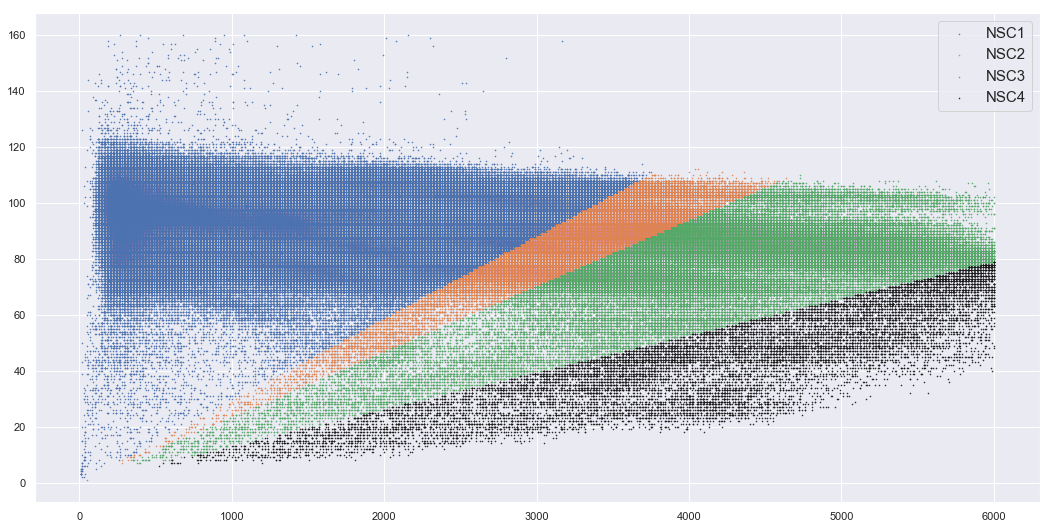

In [48]:
import pylab as plot

fig = plt.figure(figsize=(18,9))
ax1 = fig.add_subplot(111)
ax1.scatter(NSC1['Q'], NSC1['Vitesse'], s=.3, label='NSC1')
ax1.scatter(NSC2['Q'], NSC2['Vitesse'], s=.3, label='NSC2')
ax1.scatter(NSC3['Q'], NSC3['Vitesse'], s=.3, label='NSC3')
ax1.scatter(NSC4['Q'], NSC4['Vitesse'], s=.3, c = 'k', label='NSC4')

plt.legend(loc='upper right',prop={'size': 15});
plt.show()

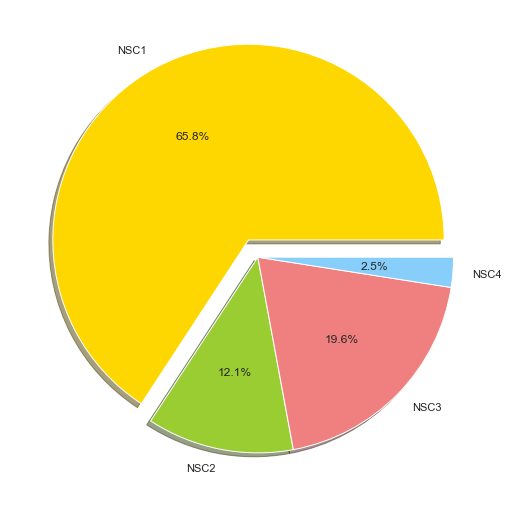

In [47]:
# Data to plot
labels = 'NSC1', 'NSC2', 'NSC3', 'NSC4'
sizes = [len(NSC1), len(NSC2), len(NSC3), len(NSC4)]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.figure(figsize=(13, 9))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

plt.show()

on cherche a déterminer le niveau de service de chaque station, il y a 44 stations, en effet :
    

In [49]:
gr = df.groupby('Code').groups
len(gr)

44

In [50]:
#Table de donnees de la station M7i
M8k = groupe.get_group('M8k')
#transformer la table en dataframe
M8k = pd.DataFrame(M8k)

,pr,m,To,Q,Vitesse,A,K
count,20338.0,20338.0,20338.000000,20338.000000,20338.000000,20338.0,20338.000000
mean,277.0,278.0,9.685761,2177.449602,83.596322,811.0,27.396720
std,0.0,0.0,7.329148,1314.454446,10.557489,0.0,18.334323
min,277.0,278.0,1.000000,20.000000,6.000000,811.0,1.785714
25%,277.0,278.0,4.000000,1100.000000,82.000000,811.0,12.676546
50%,277.0,278.0,8.000000,2020.000000,85.000000,811.0,24.606742
75%,277.0,278.0,14.000000,3180.000000,89.000000,811.0,39.411765
max,277.0,278.0,76.000000,6000.000000,111.000000,811.0,167.333333


In [51]:
# NSC 1 : trafic fluide.
NSC1 = M8k[(M8k['K'] <= 34)]
# NSC 2 : trafic de fluide a dense.
NSC2 = M8k[(M8k['K'] <= 42.65) & (M8k['K'] > 34)]
# NSC 3 : trafic dense.
NSC3 = M8k[(M8k['K'] <= 75.84) & (M8k['K'] > 42.65)]
# NSC 4 : trafic saturé.
NSC4 = M8k[(M8k['K'] > 75.84)]

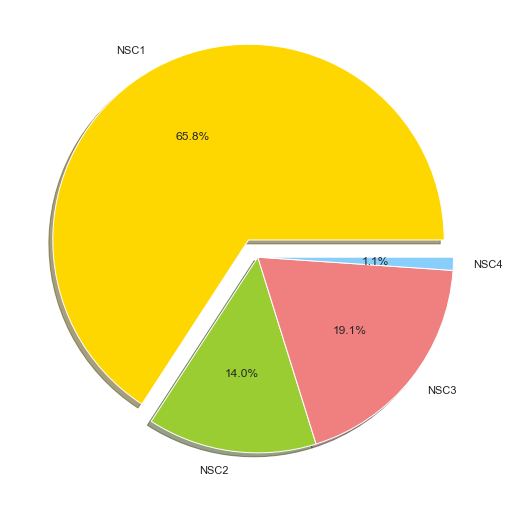

In [52]:
# Data to plot
labels = 'NSC1', 'NSC2', 'NSC3', 'NSC4'
sizes = [len(NSC1), len(NSC2), len(NSC3), len(NSC4)]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.figure(figsize=(13, 9))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

plt.show()

Il faut sortir la liste des codes de station

In [55]:
liste = groupe.groups.keys()

In [57]:
liste[2]

TypeError: 'dict_keys' object is not subscriptable

In [56]:
type(liste)

dict_keys

In [60]:
# Convert 'liste' from dict_keys to 'list'
for key in liste.keys():
  print(key)

AttributeError: 'dict_keys' object has no attribute 'keys'

In [67]:
keys = list(liste)
type(keys)

list

In [68]:
keys[2]

'M7N'

In [69]:
len(keys)

44

In [ ]:
#Table de donnees de la station M7i
M8k = groupe.get_group('M8k')
#transformer la table en dataframe
M8k = pd.DataFrame(M8k)

In [71]:
# rename columns
for i,j in zip(range( len(zip)), range(44)):
    
    df_{j} = groupe.get_group(liste[i])

SyntaxError: invalid syntax (<ipython-input-71-9dd3c6deff0b>, line 4)